Model Training


In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#Model Training


In [4]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
#Preparing X and Y variables
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']
X.shape

(1000, 7)

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create Column Transformer with 3 types of transformers
num_vars = X.select_dtypes(exclude="object").columns
cat_vars = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

    [("StandardScaler", numeric_transformer, num_vars),
        ("OneHotEncoder",oh_transformer, cat_vars)]
)

In [20]:
X = preprocessor.fit_transform(X)


In [24]:
X.shape

(1000, 19)

In [25]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((800, 19), (200, 19))

In [36]:
#Create an Evaluate Function to give all metrics after model Training
def model_evaluation(true, pred):
    r2_square = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    mse = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    return r2_square, mae, mse

In [40]:
models ={
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "Adaboost Regressor":AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Define the prediction
    pred_train_y = model.predict(X_train)
    pred_test_y = model.predict(X_test)
    # Evaluate Train and Test dataset
    
    model_Train_r2_square, model_train_mae, model_train_rmse, = model_evaluation(y_train, pred_train_y)
    
    model_Test_r2_square, model_test_mae, model_test_rmse, = model_evaluation(y_test, pred_test_y)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- R2 Score: {:.4f}".format(model_Train_r2_square))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- R2 Score: {:.4f}".format(model_Test_r2_square))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    r2_list.append(model_Test_r2_square)
    
    print('='*50)
    print('\n')


Linear Regression
Model performance for Training set
- R2 Score: 0.8743
- Root Mean Squared Error: 4.2667
- Mean Absolute Error: 4.2667
----------------------------------
Model performance for Test set
- R2 Score: 0.8804
- Root Mean Squared Error: 4.2148
- Mean Absolute Error: 4.2148


Lasso
Model performance for Training set
- R2 Score: 0.8071
- Root Mean Squared Error: 5.2063
- Mean Absolute Error: 5.2063
----------------------------------
Model performance for Test set
- R2 Score: 0.8253
- Root Mean Squared Error: 5.1579
- Mean Absolute Error: 5.1579


Ridge
Model performance for Training set
- R2 Score: 0.8743
- Root Mean Squared Error: 4.2650
- Mean Absolute Error: 4.2650
----------------------------------
Model performance for Test set
- R2 Score: 0.8806
- Root Mean Squared Error: 4.2111
- Mean Absolute Error: 4.2111


K-Neighbors Regressor
Model performance for Training set
- R2 Score: 0.8552
- Root Mean Squared Error: 4.5168
- Mean Absolute Error: 4.5168
-----------------------

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model_Name', 'R2_Score']
             ).sort_values(by=["R2_Score"],
                           ascending=False)


,Model_Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest,0.851131
8,Adaboost Regressor,0.846620
1,Lasso,0.825320
6,XGBRegressor,0.819817
3,K-Neighbors Regressor,0.783770
4,Decision Tree,0.749875


In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 88.04


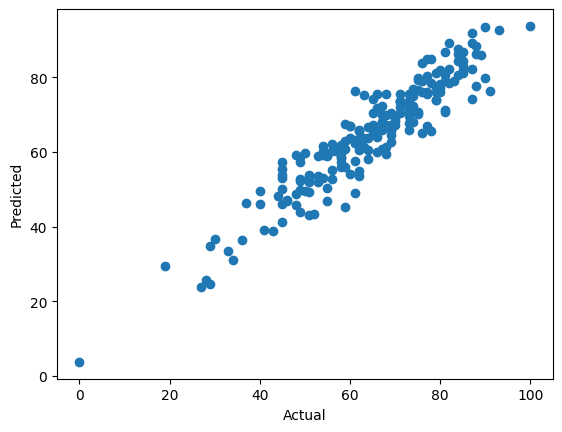

In [46]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


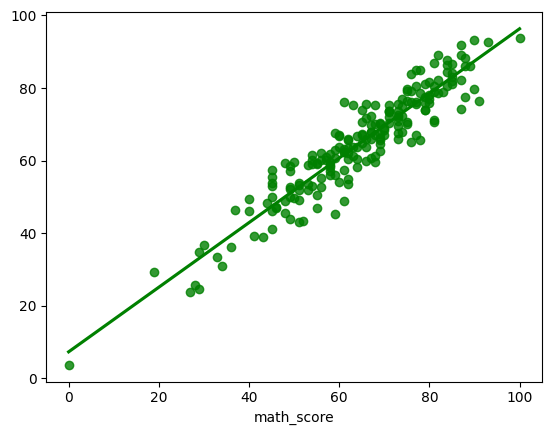

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');


In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
